# Content with notebooks

You can also create content with Jupyter Notebooks. This means that you can include
code blocks and their outputs in your book.

## Markdown + notebooks

As it is markdown, you can embed images, HTML, etc into your posts!

![](https://myst-parser.readthedocs.io/en/latest/_static/logo-wide.svg)

You can also $add_{math}$ and

$$
math^{blocks}
$$

or

$$
\begin{aligned}
\mbox{mean} la_{tex} \\ \\
math blocks
\end{aligned}
$$

But make sure you \$Escape \$your \$dollar signs \$you want to keep!

## MyST markdown

MyST markdown works in Jupyter Notebooks as well. For more information about MyST markdown, check
out [the MyST guide in Jupyter Book](https://jupyterbook.org/content/myst.html),
or see [the MyST markdown documentation](https://myst-parser.readthedocs.io/en/latest/).

## Code blocks and outputs

Jupyter Book will also embed your code blocks and output in your book.
For example, here's some sample Matplotlib code:

In [1]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

from itertools import combinations
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA as ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
pd.options.display.float_format = '{:.2f}'.format

data = pd.read_csv("C:/Users/Maestriadatos/Documents/jbook_mll202330/docs/avocado.csv")
data = data.drop('Unnamed: 0',axis = 1)
data.head()
df1 = data.copy(deep = True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace = True)
df1 = df1.resample('W').sum()
df1.head()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,140.54,84674337.20,33098258.74,36851038.43,2278818.64,12446221.39,9910008.90,2485655.90,50556.59,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-11,148.03,78555807.24,31024164.99,32808429.84,2349167.45,12374044.96,10352936.42,1977832.00,43276.54,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-18,150.24,78388784.08,31802706.86,31662041.93,2208250.55,12715784.74,10548854.11,2145586.13,21344.50,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-25,150.89,76466281.07,32305132.87,28929122.37,2078378.86,13153646.97,10877316.95,2252815.92,23514.10,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-02-01,134.68,119453235.25,50292988.96,50696230.48,3687489.31,14776526.50,11576833.65,3073989.39,125703.46,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...


Nuestro objetivo es predecir el precio promedio del aguacate utilizando un conjunto de datos que contiene información sobre las ventas y precios de este producto a lo largo del tiempo. El dataset incluye varias características relacionadas con las ventas de aguacates, y aquí te explico brevemente qué representa cada una:

Date: La fecha de la observación, indicando cuándo se registraron los datos.
AveragePrice: El precio promedio de un solo aguacate en esa fecha, que es la variable que queremos predecir.
Total Volume: El volumen total de aguacates vendidos en esa fecha.
4046, 4225, 4770: Son códigos PLU (Price Look-Up) que identifican diferentes tipos de aguacates, y cada columna muestra la cantidad vendida para esos códigos.
Total Bags: El número total de bolsas de aguacates vendidas.
Small Bags, Large Bags, XLarge Bags: La cantidad de bolsas vendidas, separadas por tamaño (pequeñas, grandes y extra grandes).
Type: Indica si los aguacates son convencionales u orgánicos.
Year: El año en que se realizó la observación.
Region: La ciudad o región de la observación.
El enfoque será utilizar la información histórica de estas variables para predecir el precio promedio del aguacate en fechas futuras. Esto es importante porque el precio del aguacate puede variar según factores como la temporada, la región y el tipo de aguacate (orgánico o convencional). Al utilizar modelos estadísticos, como SARIMA, podemos aprovechar patrones estacionales y de tendencia en los datos históricos para hacer estimaciones más precisas sobre los precios futuros.

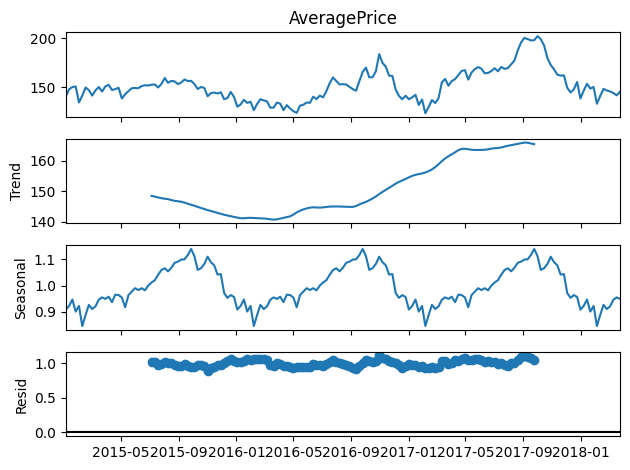

In [3]:

dec = sm.tsa.seasonal_decompose(df1['AveragePrice'], model = 'multiplicative').plot()
plt.show();


Al descomponer la serie de tiempo del precio promedio del aguacate, hemos identificado un patrón estacional claro. Esto significa que los precios muestran fluctuaciones predecibles en ciertos períodos del año, lo que puede ser atribuido a factores estacionales como cambios en la oferta, demanda o condiciones climáticas que afectan la producción de aguacates.

Análisis de la Descomposición:
Tendencia: Se observa una tendencia general en el tiempo, con aumentos y disminuciones en los precios promedio que sugieren un comportamiento a largo plazo.
Estacionalidad: La descomposición reveló que los precios promedio tienden a aumentar o disminuir en ciertos momentos del año de manera consistente. Por ejemplo, podríamos ver que los precios son más altos durante ciertos meses en el año debido a la demanda estacional o la disponibilidad del producto.
Ruido: También hay variaciones aleatorias que no se pueden atribuir ni a la tendencia ni a la estacionalidad, lo que representa el comportamiento errático del mercado.
Justificación para el Modelo SARIMA:
Dado que hemos identificado un patrón estacional en los datos, el uso de un modelo SARIMA (Seasonal AutoRegressive Integrated Moving Average) es apropiado. Este modelo es eficaz para capturar tanto las dinámicas estacionales como las no estacionales en la serie de tiempo.

El modelo SARIMA tiene componentes que permiten:

Diferenciación estacional: Para abordar la estacionalidad en los datos, asegurando que los patrones estacionales se modelen adecuadamente.
Elementos autoregresivos y de medias móviles: Para capturar las dependencias en los datos a lo largo del tiempo, considerando la relación entre observaciones pasadas y presentes.
Al implementar un modelo SARIMA, podemos mejorar nuestras predicciones del precio promedio del aguacate, aprovechando la información de patrones históricos y estacionales. Esto nos permitirá tomar decisiones más informadas en función de las tendencias esperadas en el mercado del aguacate.

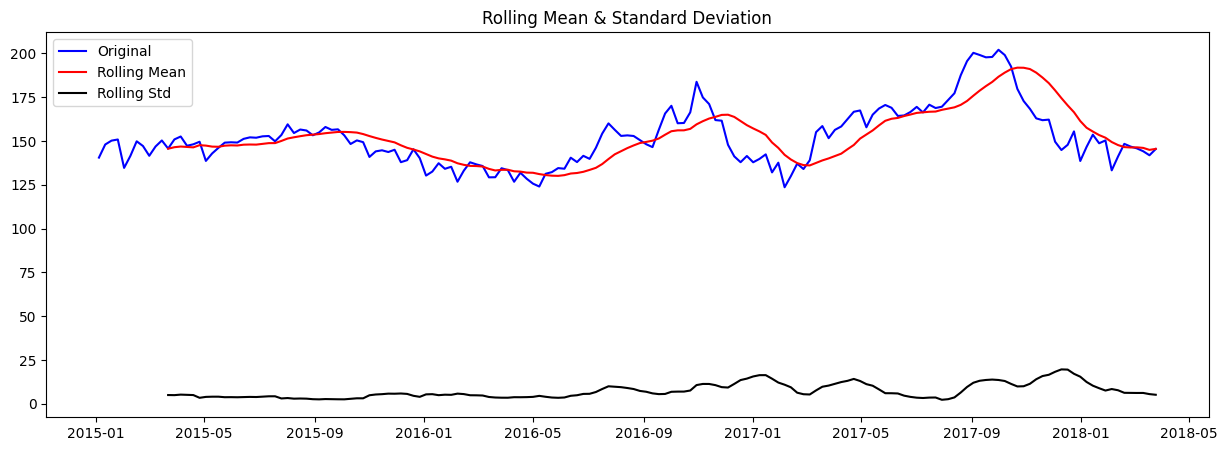

Results of Dickey-Fuller Test:
Test Statistic                 -2.36
p-value                         0.15
#Lags Used                      0.00
Number of Observations Used   168.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64


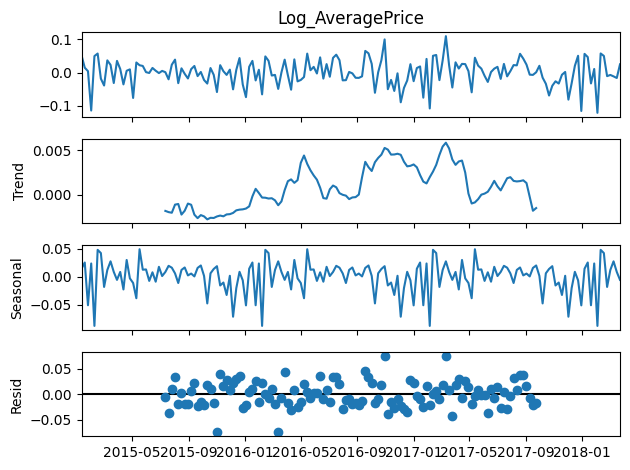

In [4]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window = 12).mean()
    MSTD = timeseries.rolling(window = 12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

test_stationarity(df1['AveragePrice'])

df1['Log_AveragePrice'] = np.log(df1['AveragePrice'])
df1_log_diff = df1['Log_AveragePrice'].diff()
df1_log_diff = df1_log_diff.dropna()

dec = sm.tsa.seasonal_decompose(df1_log_diff,period = 52).plot()
plt.show()


Al revisar los resultados de la prueba de Dickey-Fuller, hemos encontrado que nuestra serie de tiempo no presenta estacionariedad. Esto es un aspecto crítico en el análisis de series temporales, ya que un modelo SARIMA requiere que los datos sean estacionarios para ofrecer predicciones precisas.

Implicaciones de la No Estacionariedad:
Tendencia y Estacionalidad: La falta de estacionariedad indica que los datos exhiben tendencias o patrones que cambian con el tiempo, lo que puede dificultar la identificación de relaciones y la modelización adecuada de la serie.
Dependencia del Tiempo: Esto sugiere que las características de la serie temporal, como la media y la varianza, no son constantes a lo largo del tiempo.
Estrategia para Lograr la Estacionariedad:
Para abordar esta falta de estacionariedad, realizaremos una diferenciación de primer orden. Esto implica calcular la diferencia entre los valores actuales y los valores anteriores de la serie de tiempo, lo que puede ayudar a eliminar tendencias y estabilizar la media de la serie.

Este proceso se lleva a cabo de la siguiente manera:

Diferenciación: Al aplicar la diferencia de primer orden, transformaremos nuestra serie de tiempo original en una nueva serie que idealmente debería ser estacionaria. Esto permitirá que el modelo SARIMA sea más adecuado y efectivo al capturar las dinámicas del precio promedio del aguacate.
Con esta transformación, estaremos en una mejor posición para ajustar nuestro modelo SARIMA y realizar predicciones más precisas sobre el comportamiento futuro de los precios del aguacate.

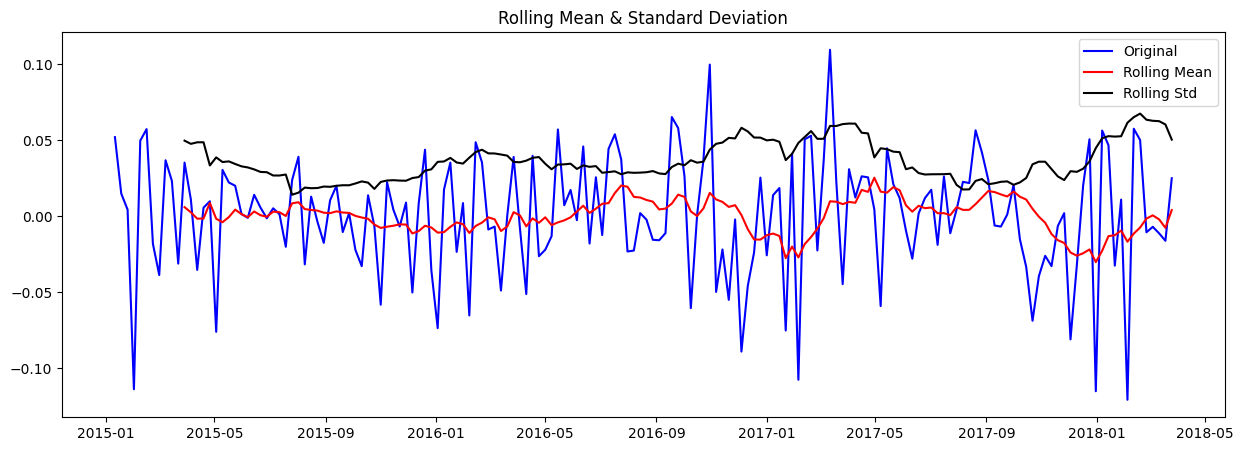

Results of Dickey-Fuller Test:
Test Statistic                -13.82
p-value                         0.00
#Lags Used                      0.00
Number of Observations Used   167.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64


In [5]:
test_stationarity(df1_log_diff)


Después de aplicar la diferenciación de primer orden a nuestra serie de tiempo, realizamos nuevamente la prueba de Dickey-Fuller para evaluar la estacionariedad de los datos transformados. Los resultados obtenidos de esta segunda prueba confirmaron que ahora la serie presenta las características deseadas de estacionariedad.

Resultados Positivos:
La prueba de Dickey-Fuller mostró que la serie de tiempo diferenciada tiene una media y varianza constantes a lo largo del tiempo, lo que indica que hemos eliminado las tendencias y patrones no estacionarios presentes en la serie original.
Con esta transformación exitosa, los resultados del test indican que podemos proceder con confianza al ajuste de un modelo SARIMA, ya que la serie ahora cumple con uno de los supuestos fundamentales requeridos para este tipo de modelización.
Este logro es un paso crucial en nuestro análisis, ya que una serie estacionaria nos permitirá realizar predicciones más precisas sobre el precio promedio del aguacate en el futuro, utilizando la información histórica y los patrones estacionales que hemos identificado.

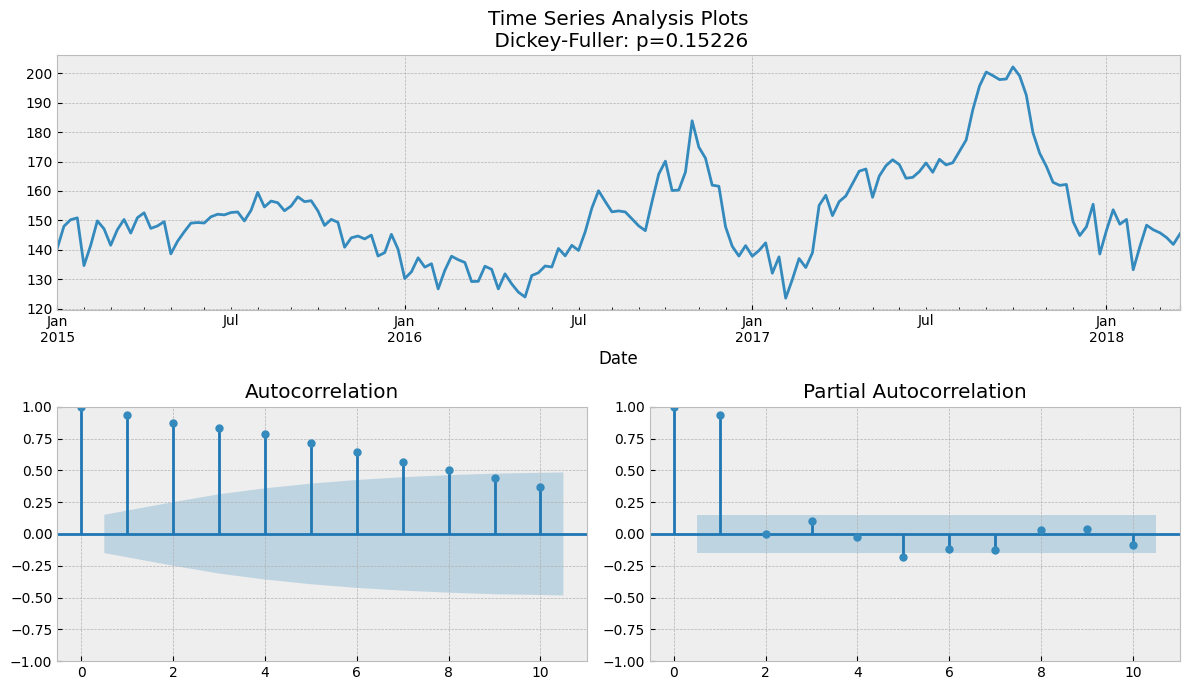

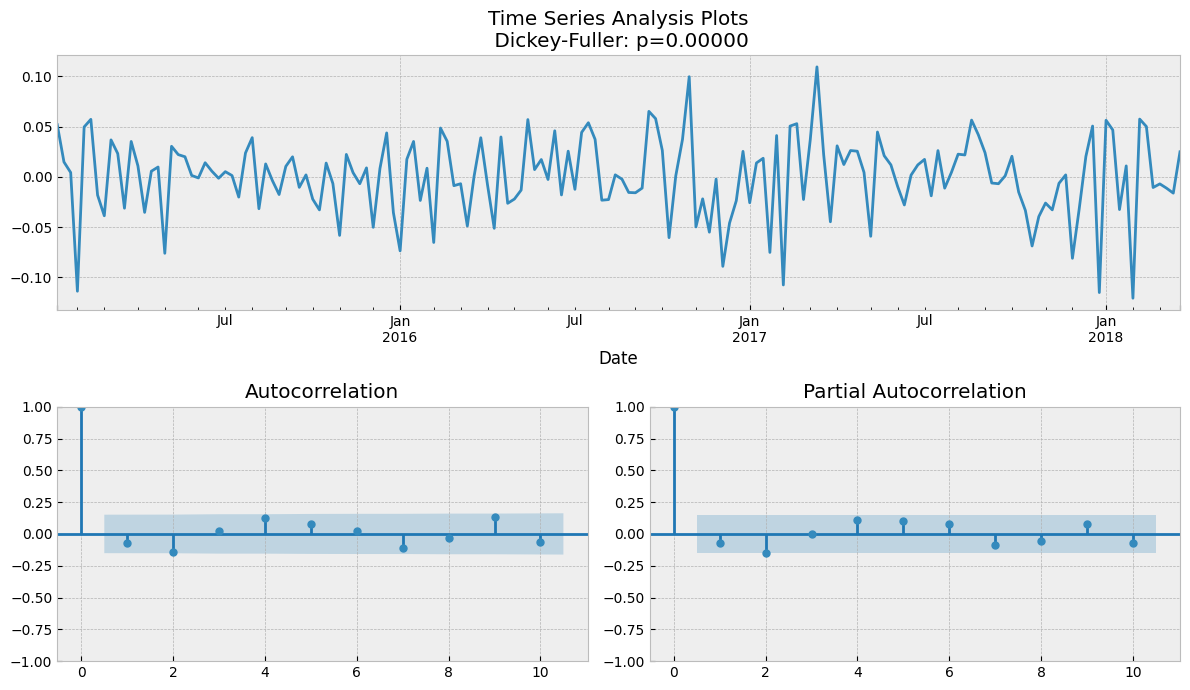

In [6]:
tsplot(df1['AveragePrice'],lags = 10)

tsplot(df1_log_diff,lags = 10)




Después de probar varios modelos de predicción, hemos seleccionado el siguiente modelo como el más adecuado para nuestros datos: ARIMA(1,1,0)(1,1,0)[52]. Este modelo fue elegido debido a su rendimiento óptimo en términos de ajuste a los datos y su capacidad para capturar tanto las dinámicas estacionales como las no estacionales de la serie de tiempo del precio promedio del aguacate.

Resultados del Modelo Seleccionado:
Número de Observaciones: 168
Log Likelihood: 164.227
AIC: -322.454
BIC: -314.220
Tiempo Total de Ajuste: 205.077 segundos

Mean Squared Error: 280.687777151872


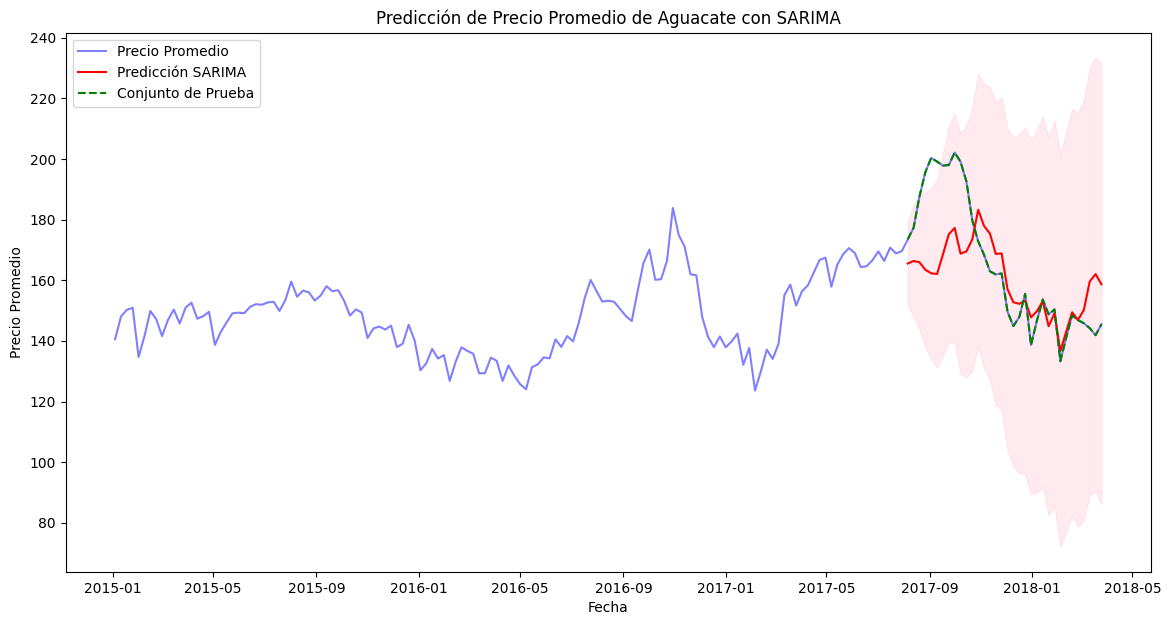

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Supongamos que df1 ya contiene la serie de tiempo
# Dividir los datos en entrenamiento y prueba
train_size = int(len(df1) * 0.8)  # 80% para entrenamiento
train, test = df1['AveragePrice'][:train_size], df1['AveragePrice'][train_size:]

# Ajustar el modelo SARIMA
model = SARIMAX(train, order=(1, 1, 0), seasonal_order=(1, 1, 0, 52))
results = model.fit()

# Realizar predicciones en el conjunto de prueba
pred = results.get_forecast(steps=len(test))
pred_conf = pred.conf_int()

# Calcular el error cuadrático medio
mse = mean_squared_error(test, pred.predicted_mean)
print(f'Mean Squared Error: {mse}')

# Graficar la serie de tiempo, las predicciones y el conjunto de prueba
plt.figure(figsize=(14, 7))
plt.plot(df1['AveragePrice'], label='Precio Promedio', color='blue', alpha=0.5)
plt.plot(pred.predicted_mean.index, pred.predicted_mean, label='Predicción SARIMA', color='red')
plt.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='pink', alpha=0.3)
plt.plot(test.index, test, label='Conjunto de Prueba', color='green', linestyle='--')

# Configuraciones de la gráfica
plt.title('Predicción de Precio Promedio de Aguacate con SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.legend()
plt.show()


En nuestro estudio, decidimos desarrollar un modelo SARIMA (Seasonal Autoregressive Integrated Moving Average) para predecir el precio promedio del aguacate, basándonos en las características de la serie de tiempo de nuestros datos. La elección del modelo SARIMA se justificó por varias razones que aseguran su idoneidad para el análisis de los precios de exportación del aguacate.

En primer lugar, observamos que la serie de tiempo presentaba patrones estacionales evidentes, lo que indica que el precio del aguacate no solo es influenciado por tendencias a largo plazo, sino también por fluctuaciones estacionales que pueden repetirse anualmente. Por lo tanto, un modelo que pudiera capturar tanto la autoregresión como los efectos estacionales resultó ser esencial para obtener predicciones más precisas.

Además, el modelo SARIMA permite trabajar con datos no estacionarios, ya que incorpora el proceso de diferenciación, lo cual es fundamental cuando los datos muestran una tendencia o patrones que cambian con el tiempo. A través de la diferenciación de primer orden, logramos estabilizar la serie y cumplir con el requisito de estacionariedad, lo que es crucial para la validez de los resultados del modelo.

La metodología de selección de parámetros en el modelo SARIMA se basó en el análisis de las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF), así como en criterios de selección como el Criterio de Información de Akaike (AIC). Estos pasos garantizaron que el modelo fuera no solo adecuado, sino también parsimonioso, es decir, que utilizara la menor cantidad de parámetros posible sin sacrificar la calidad del ajuste.

En resumen, la elección del modelo SARIMA fue impulsada por la necesidad de capturar tanto las dinámicas estacionales como las tendencias subyacentes en los precios del aguacate. Su flexibilidad para manejar datos no estacionarios y su capacidad para realizar pronósticos más precisos hacen de este modelo una herramienta eficaz en nuestro análisis de precios de exportación, permitiéndonos ofrecer una perspectiva más clara sobre las tendencias futuras del mercado.

Aguilar, B. A., & Acosta Abreu, R. S. (Año). Ajuste de un modelo ARIMA para los precios de exportación del aguacate calibre 60. Licenciatura en Física y Matemáticas, ESFM-IPN, México D.F., México.

El estudio realizado por Belem A. Aguilar y Roberto S. Acosta Abreu se centra en la dinámica de los precios de exportación del aguacate calibre 60 hacia Estados Unidos, un mercado clave para este producto que ha visto un incremento significativo en la demanda en los últimos años. Este crecimiento ha provocado no solo un aumento en las ventas, sino también fluctuaciones notables en los precios de exportación, lo que requiere una comprensión profunda de los factores que influyen en estas variaciones. Para abordar este desafío, se eligió un modelo ARIMA (Autoregressive Integrated Moving Average), ampliamente reconocido en el análisis de series de tiempo, especialmente útil para datos que muestran patrones no estacionarios y estacionales.

La elección del modelo ARIMA se basa en varios criterios que aseguran su idoneidad para el análisis de precios de exportación del aguacate. En primer lugar, se buscó un modelo que proporcionara un ajuste adecuado a la serie de tiempo, considerando diferentes modelos que cumplieran con esta característica. Además, se utilizó el método de Estimación de Máxima Verisimilitud (ML), que es efectivo para series de longitud moderada y modelos estocásticos estacionales, alineándose con las características de los datos analizados. El Criterio de Información de Akaike (AIC) se aplicó para seleccionar el modelo, eligiendo aquel que minimizara la divergencia Kullback-Leibler entre el modelo estimado y el modelo real, lo que proporciona una medida rigurosa de la calidad del ajuste.

Asimismo, se priorizó la simplicidad y efectividad del modelo, buscando un ajuste que utilizara el menor número posible de coeficientes. Es crucial que el modelo elegido sea estacionario e invertible, asegurando que los resultados sean fiables para la predicción futura. También se identificaron patrones estacionales en los precios, lo que llevó a considerar un modelo que pudiera manejar adecuadamente estos efectos. Para evaluar la adecuación del modelo y su capacidad para capturar las dinámicas de la serie de tiempo, se realizaron análisis gráficos, como ACF y PACF. A pesar de algunas variaciones en la varianza, el modelo final demostró ser práctico y adecuado, con predicciones razonables en los intervalos de confianza.

En conclusión, el modelo ARIMA seleccionado, con sus capacidades para ajustarse a los datos observados y su eficacia en la estimación de parámetros, representa una herramienta adecuada para el análisis de precios de exportación. La metodología Box-Jenkins proporciona un marco robusto para la identificación y selección del modelo más apropiado, asegurando que se cumplan los requisitos estadísticos necesarios para obtener resultados confiables. Esto no solo beneficia a los productores y exportadores de aguacate, sino que también contribuye a una comprensión más profunda de la dinámica del mercado agrícola en un contexto global.

There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://jupyterbook.org)